In [1]:
from glob import glob
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams["figure.figsize"] = (16, 9)

In [2]:
from retina_face_net import RetinaFaceNet, \
    RetinaFaceNetPrediction, BoundingBox, Point

In [3]:
WEIGHTS_PATH = '/weights/weights.pth'

## Visualisation

In [4]:
from typing import List

def draw_predictions(
    image: np.ndarray,
    predictions: List[RetinaFaceNetPrediction]
) -> np.ndarray:
    image = image.copy()
    for prediction in predictions:
        bbox = prediction.bbox
        cv.rectangle(
            img=image,
            pt1=bbox.left_top.compact_form,
            pt2=bbox.right_bottom.compact_form,
            color=(0, 255, 0),
            thickness=5
        )
        image = draw_keypoints(image=image, keypoints=prediction.landmarks)
    return image

def draw_keypoints(
    image: np.ndarray,
    keypoints: List[Point]
) -> np.ndarray:
    for point in keypoints:
        cv.circle(image, point.compact_form, 4, (255,0,0), -1)
    return image

## Demo

In [5]:
MODEL = RetinaFaceNet.initialize(
    weights_path=WEIGHTS_PATH,
    top_k=50,
    confidence_threshold=0.2
)

INFO:root:Loading pre-trained model from /weights/weights.pth
INFO:root:Missing keys:0
INFO:root:Unused checkpoint keys:0
INFO:root:Used keys:456


In [6]:
IMAGES_PATHS = glob("../data/object_detection/*")

In [7]:
IMAGES_PATHS

['../data/object_detection/8.jpg',
 '../data/object_detection/9.jpg',
 '../data/object_detection/2.jpg',
 '../data/object_detection/4.jpg',
 '../data/object_detection/5.jpg',
 '../data/object_detection/3.jpg',
 '../data/object_detection/7.jpg',
 '../data/object_detection/6.jpg',
 '../data/object_detection/1.jpg']

In [8]:
IMAGE = cv.imread(IMAGES_PATHS[2])[:, :, ::-1]

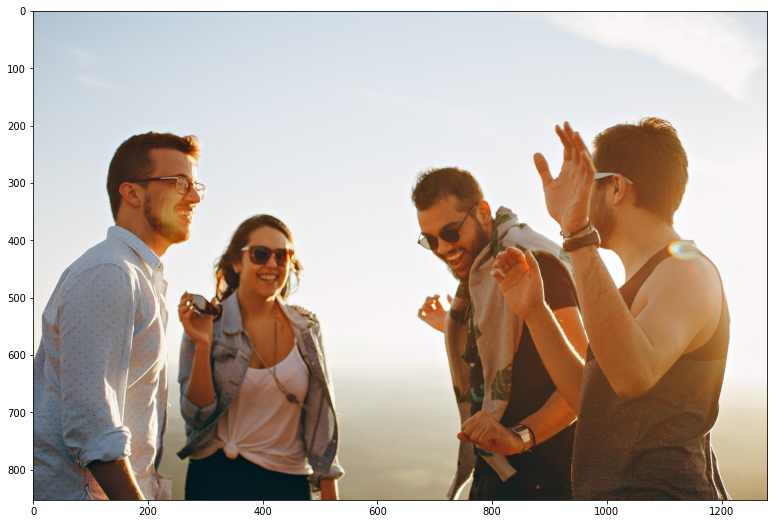

In [9]:
plt.imshow(IMAGE)

In [10]:
INFERENCE_RESULTS = MODEL.infer(image=IMAGE)

In [11]:
VISUALISATION_RESULTS = draw_predictions(
    image=IMAGE,
    predictions=INFERENCE_RESULTS
)

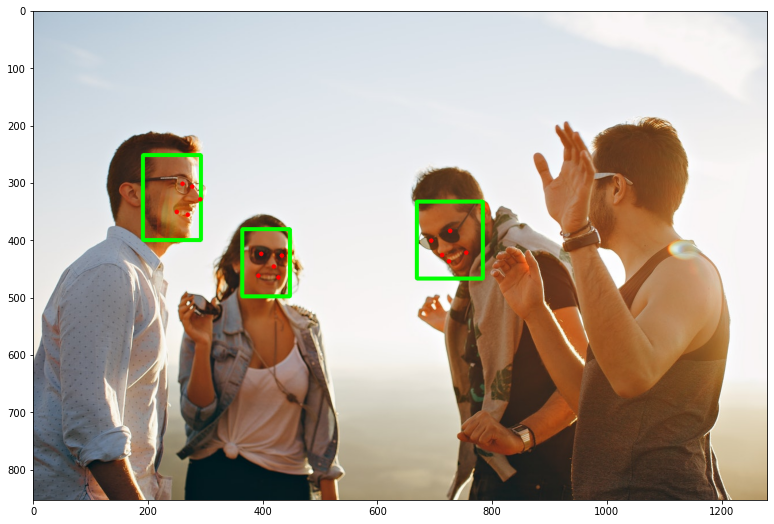

In [12]:
plt.imshow(VISUALISATION_RESULTS)